# What's the data like?

In [1]:
%load_ext autoreload
%autoreload 2
p = print
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
import os, dotenv

coin = 'BTC'

project_path = os.path.dirname(dotenv.find_dotenv())
raw_data_path = os.path.join(project_path, 'data', 'raw', coin + '.csv')

In [2]:
"""
load data
"""
df = pd.read_csv(raw_data_path, index_col=0)
p('data shape is: ', df.shape)
df.head()

data shape is:  (5999, 8)


,volumeto,volumefrom,open,high,close,low,time,timestamp
0,6935520.93,1096.93,6314.14,6322.24,6313.66,6290.84,1530471600,2018-07-01 21:00:00
1,24714923.33,3879.19,6313.94,6378.28,6347.37,6298.49,1530475200,2018-07-01 22:00:00
2,9517750.88,1496.49,6347.37,6359.64,6355.81,6331.35,1530478800,2018-07-01 23:00:00
3,12533312.19,1965.11,6355.81,6371.16,6355.41,6346.47,1530482400,2018-07-02 00:00:00
4,13213908.33,2074.03,6355.41,6371.17,6339.04,6337.97,1530486000,2018-07-02 01:00:00


In [3]:
"""
descriptive stats
"""
df.describe()

,volumeto,volumefrom,open,high,close,low,time
count,5.999000e+03,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5.999000e+03
mean,1.406895e+07,2646.571230,5393.506678,5411.562859,5393.075863,5374.030610,1.541268e+09
std,1.617591e+07,2969.641439,1497.569315,1500.447325,1497.630439,1494.648369,6.234863e+06
min,8.541996e+05,223.220000,3183.270000,3198.460000,3183.270000,3169.530000,1.530472e+09
25%,5.857394e+06,1163.405000,3819.780000,3831.190000,3819.780000,3801.565000,1.535870e+09
50%,9.636657e+06,1790.010000,6278.040000,6299.530000,6277.980000,6260.040000,1.541268e+09
75%,1.609624e+07,2946.895000,6541.155000,6557.380000,6540.985000,6525.665000,1.546666e+09
max,2.933873e+08,49903.120000,8431.180000,8485.710000,8431.180000,8387.260000,1.552064e+09


In [4]:
"""
Confirm that no NA values are present
"""
p('nan values in data: ', df.dropna().shape != df.shape)

nan values in data:  False


In [5]:
"""
Take a small sample for plotting
"""
sample = df.sample(n=1000, replace=False)

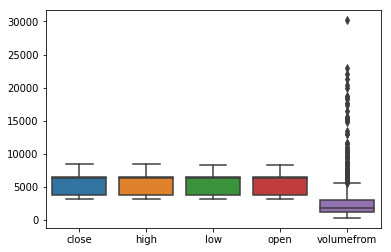

In [6]:
"""
Check relative distribution of data features
"""
sns.boxplot(data=sample[['close', 'high', 'low', 'open', 'volumefrom']])

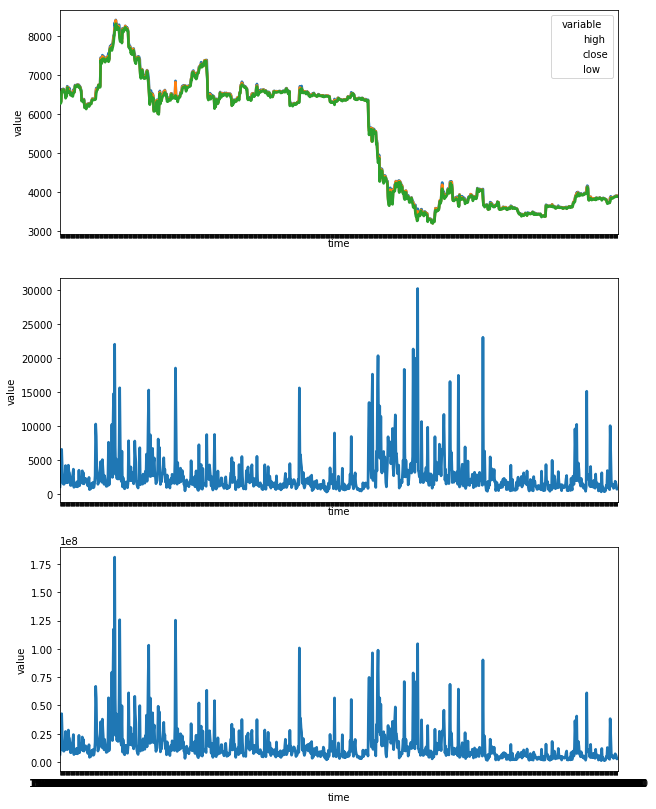

In [7]:
"""
Plot data features against time. Making sure that the data set was created correctly / sanity check.
"""

pltdf = sample.copy(). \
    melt(id_vars='time')

fig, ax = plt.subplots(3, sharex=True, figsize=(10, 14))


sns.pointplot(ax=ax[0], data=pltdf[pltdf.variable.isin(['low', 'high', 'close'])], 
              x='time', y='value', hue='variable', linestyles='-', markers='')
sns.pointplot(ax=ax[1], data=pltdf[pltdf.variable.isin(['volumefrom'])], 
              x='time', y='value', linestyles='-', markers='')
sns.pointplot(ax=ax[2], data=pltdf[pltdf.variable.isin(['volumeto'])], 
              x='time', y='value', linestyles='-', markers='')